### 1) Delivery_time -> Predict delivery time using sorting time 

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df_new=df.rename({'Delivery Time':'delivery_time','Sorting Time':"sorting_time"},axis=1)
df_new

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### CORRELATION

In [5]:
df_new.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\PRIYANKA\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


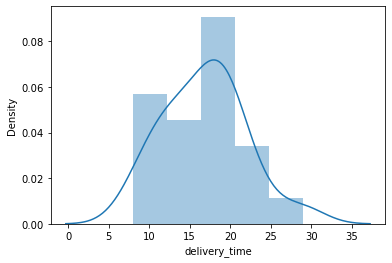

In [6]:
import seaborn as sns
sns.distplot(df_new['delivery_time'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

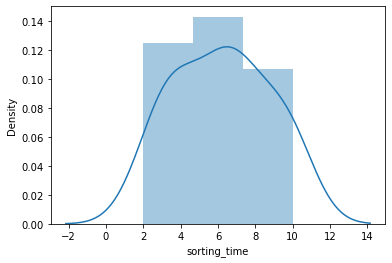

In [7]:
import seaborn as sns
sns.distplot(df_new['sorting_time'])

### FITTING A LINEAR REGRESSION MODEL

In [8]:
from scipy import stats
import statsmodels.formula.api as smf
model= smf.ols("delivery_time~sorting_time",data=df_new).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

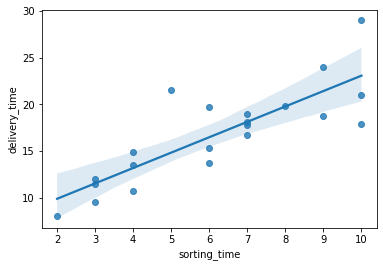

In [9]:
sns.regplot(x='sorting_time',y='delivery_time',data=df_new)

In [10]:
#coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [12]:
#Rsquared values
print(model.rsquared)
#its an excellent equation as its value is 0.9

0.6822714748417231


###   PREDICTION OF NEW DATA


In [13]:
#AUTOMATIC PREDICTION

In [14]:
#Predict for 5 and 8 as sorting time
df_new_data=pd.Series([5,8])

In [15]:
df_new_data

0    5
1    8
dtype: int64

In [16]:
df_new_data_pred=pd.DataFrame(df_new_data,columns=['sorting_time'])

In [17]:
df_new_data_pred

,sorting_time
0,5
1,8


In [18]:
model.predict(df_new_data_pred)

0    14.827833
1    19.774893
dtype: float64

In [19]:
#MANUAL PREDICTION(Y=B0+B1X+C).....let sorting time=5

DELIVERY TIME=INTERCEPT+[SORTING TIME*(5)]

In [22]:
delivery_time= 6.582734+(1.649020*5)
delivery_time

14.827834

In [23]:
delivery_time= 6.582734+(1.649020*8)
delivery_time

19.774894

### 2.Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [25]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
Salary_Data=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\Salary_Data.csv")
Salary_Data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### EDA AND DATA VISUALIZATION

In [27]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

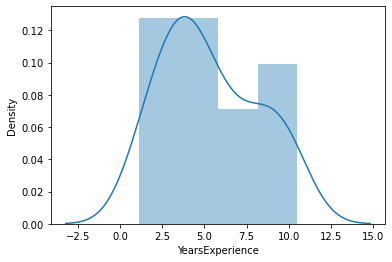

In [28]:
import seaborn as sns
sns.distplot(Salary_Data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

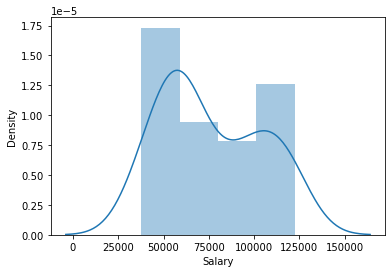

In [29]:
import seaborn as sns
sns.distplot(Salary_Data['Salary'])

### CORRELATION ANALYSIS

In [30]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [31]:
# HERE THE CORRELATION IS 0.97 WHICH IMPLIES IT IS AN EXCELLENT CORRELATION

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

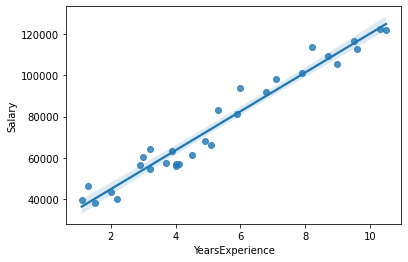

In [32]:
sns.regplot(x="YearsExperience",y='Salary',data=Salary_Data)

### MODEL BULDING

In [33]:
model=smf.ols("Salary~YearsExperience",data=Salary_Data).fit()

In [34]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [36]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [37]:
model.rsquared

0.9569566641435086

In [38]:
model.rsquared_adj

0.9554194021486339

### MODEL PREDICTION

In [39]:
#MANUAL WAY
salary_hike=25792.200199+(9449.962321*2)
salary_hike

44692.124841

In [40]:
#AUTOMATIC PREDICTION
salary_hike=pd.Series([2,7])
salary_hike

0    2
1    7
dtype: int64

In [41]:
salary_hike_pred=pd.DataFrame(salary_hike,columns=['YearsExperience'])
salary_hike_pred

,YearsExperience
0,2
1,7


In [42]:
model.predict(salary_hike_pred)

0    44692.124842
1    91941.936449
dtype: float64